<a href="https://colab.research.google.com/github/hayrapetyan-armine/deep-learning/blob/master/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'1.13.1'

In [0]:
mnist = tf.keras.datasets.mnist # 28*28 images of handwritten digits 0-9

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
import matplotlib.pyplot as plt

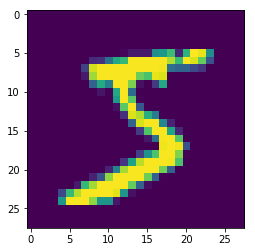

In [0]:
plt.imshow(x_train[0])

In [0]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

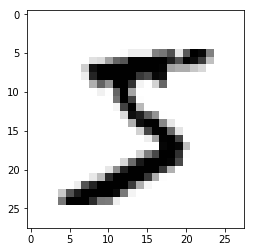

In [0]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [0]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
60000/60000 [==============================] - 8s 136us/sample - loss: 0.2596 - acc: 0.9244
Epoch 2/3
60000/60000 [==============================] - 7s 118us/sample - loss: 0.1078 - acc: 0.9672
Epoch 3/3
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0735 - acc: 0.9764


In [0]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.1033 - acc: 0.9668
0.10334200542941689 0.9668


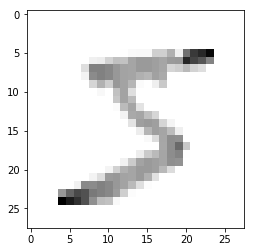

In [0]:
plt.imshow(x_train[0], cmap = plt.cm.binary);

In [0]:
model.save('epic_num_reader.model')

In [0]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [0]:
predictions = new_model.predict(x_test)
predictions

array([[2.2321643e-07, 7.6814368e-09, 7.4266068e-06, ..., 9.9987841e-01,
        2.3492771e-07, 4.1588493e-05],
       [5.6501278e-08, 5.0545728e-05, 9.9988782e-01, ..., 4.2515125e-09,
        4.6742857e-06, 1.3883508e-10],
       [9.8766204e-06, 9.9168903e-01, 6.7834269e-05, ..., 7.1822916e-04,
        3.9736638e-04, 4.2229858e-05],
       ...,
       [1.9025309e-07, 9.4176681e-07, 1.0383064e-06, ..., 1.0833645e-04,
        2.6288162e-06, 6.8711925e-06],
       [4.9830487e-06, 9.8206590e-07, 8.8136733e-07, ..., 1.1146086e-06,
        2.0615438e-03, 5.6506060e-08],
       [2.9620628e-08, 2.9599263e-09, 6.0733896e-08, ..., 4.5439538e-12,
        1.9061840e-08, 1.3363380e-10]], dtype=float32)

In [0]:
import numpy as np
np.argmax(predictions[0])

7

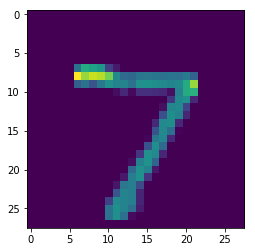

In [0]:
plt.imshow(x_test[0])
plt.show()